<a href="https://colab.research.google.com/github/ilham-mukti/Machine-Learning/blob/main/Latihan_Pandas_3_(Encoding_Binning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
datas = pd.read_csv('/content/diabetes.csv')
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
datas.Age.value_counts()

**# Label Encoding vs One Hot Encoding/Dummy Variable**

**Label Encoding dipake:**
1. Kalo labelnya cuma 2 => Male - Female
2. Kalo datanya ordinal => Dingin - Hangat - Panas

**One-Hot Encoding:**
1. Bisa2 aja semuanya, tp kalo boolean mubazir aja.

In [6]:
def encode(x):
  if x < 30:
    x = "Muda"
  elif x > 30 and x < 60:
    x = "Tua"
  else:
    x = "Kakek/Nenek"
  return x

In [7]:
datas['Age_Range'] = datas.Age.apply(encode)
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Range
0,6,148,72,35,0,33.6,0.627,50,1,Tua
1,1,85,66,29,0,26.6,0.351,31,0,Tua
2,8,183,64,0,0,23.3,0.672,32,1,Tua
3,1,89,66,23,94,28.1,0.167,21,0,Muda
4,0,137,40,35,168,43.1,2.288,33,1,Tua


In [8]:
def decode(x):
  if x == "Muda":
    x = 0
  elif x == "Tua":
    x = 1
  else:
    x = 2
  return x

In [11]:
 datas['Age_Levels'] = datas.Age_Range.apply(decode)
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Range,Age_Levels
0,6,148,72,35,0,33.6,0.627,50,1,Tua,1
1,1,85,66,29,0,26.6,0.351,31,0,Tua,1
2,8,183,64,0,0,23.3,0.672,32,1,Tua,1
3,1,89,66,23,94,28.1,0.167,21,0,Muda,0
4,0,137,40,35,168,43.1,2.288,33,1,Tua,1


**# Contoh One Hot Encoding/Dummy Variable**

In [15]:
datas = pd.get_dummies(datas, columns=['Age_Range'])
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Levels,Age_Range_Kakek/Nenek,Age_Range_Muda,Age_Range_Tua
0,6,148,72,35,0,33.6,0.627,50,1,1,0,0,1
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1,0,0,1
3,1,89,66,23,94,28.1,0.167,21,0,0,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1,0,0,1


# **# Binning Dari numerik ke kategorik**

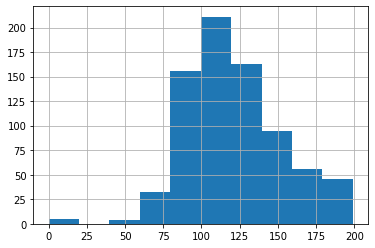

In [17]:
datas.Glucose.hist()

In [19]:
datas['Glucose_bin'] = pd.cut(datas.Glucose, bins=3, labels=['low', 'medium', 'high'])
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Levels,Age_Range_Kakek/Nenek,Age_Range_Muda,Age_Range_Tua,Glucose_bin
0,6,148,72,35,0,33.6,0.627,50,1,1,0,0,1,high
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,1,medium
2,8,183,64,0,0,23.3,0.672,32,1,1,0,0,1,high
3,1,89,66,23,94,28.1,0.167,21,0,0,0,1,0,medium
4,0,137,40,35,168,43.1,2.288,33,1,1,0,0,1,high


In [20]:
datas['Glucose_bin_manual'] = pd.cut(datas.Glucose, bins=[0, 75, 150, datas.Glucose.max()], labels=['low', 'medium', 'high'])
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Levels,Age_Range_Kakek/Nenek,Age_Range_Muda,Age_Range_Tua,Glucose_bin,Glucose_bin_manual
0,6,148,72,35,0,33.6,0.627,50,1,1,0,0,1,high,medium
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,1,medium,medium
2,8,183,64,0,0,23.3,0.672,32,1,1,0,0,1,high,high
3,1,89,66,23,94,28.1,0.167,21,0,0,0,1,0,medium,medium
4,0,137,40,35,168,43.1,2.288,33,1,1,0,0,1,high,medium
